## Analysis of Drug Classification Dataset

### 1. Importing Data

Data is imported from https://www.kaggle.com/datasets/prathamtripathi/drug-classification/data. The dataset imported indicates the gender and age of the person who took a type of drug, as well as their blood pressure, cholesterol levels as well as Sodium to Potassium ratio. The purpose of this analysis is to create a model to correctly classify the class of drug based on these features. Since we are doing a classification based model, we can utilise KNN Algorithm or Logistic Regression.

The process of this analysis will include:
1. Importing data
2. Exploring data
3. Data Visualisation
4. Cleaning & Preparing data
5. Training and Testing data for KNN Model and Logistic Regression Model
6. Modelling for KNN & Logistic Regression
7. Conclusion

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
drugs = pd.read_csv('drug200.csv')
drugs.shape

(200, 6)

There are 200 observations and 6 different features in this dataset.

### 2. Exploring Data

In [103]:
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [104]:
drugs.isna().sum() #Checking for any missing values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [105]:
drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [106]:
print('Drug Classes: ', set(drugs['Drug'])) 
print('Blood Pressure Classes: ', set(drugs['BP']))
print('Cholesterol Classes: ', set(drugs['Cholesterol']))
print('Gender: ', set(drugs['Sex']))

Drug Classes:  {'drugA', 'DrugY', 'drugC', 'drugX', 'drugB'}
Blood Pressure Classes:  {'HIGH', 'NORMAL', 'LOW'}
Cholesterol Classes:  {'HIGH', 'NORMAL'}
Gender:  {'F', 'M'}


### 3. Data Visualisation

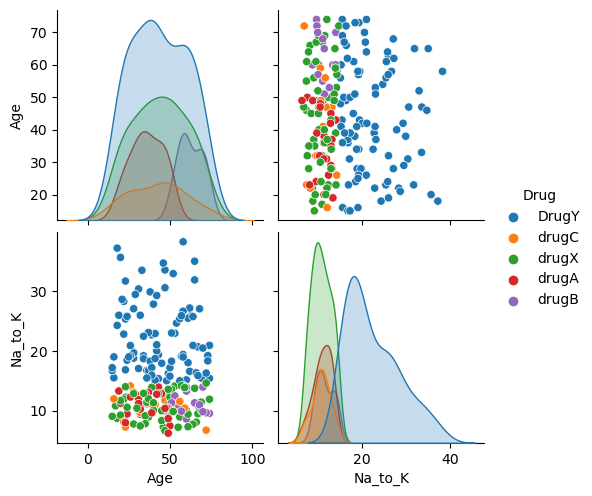

In [107]:
sns.pairplot(drugs, hue = 'Drug')

Drug A Observations: Distribution between ages is normal but skewed to the right, where mean age is around 40. People who use this drug category tend to be below age 50 and have Na_to_K of 5 to 15.

Drug B Observations: Distribution between ages is not normal and skewed to the left, where mean age is around 60-70. People who use this drug category tend to be above age 50 and have Na_to_K of 5 to 15.

Drug C Observations: Distribution between ages is normal and evenly distributed, where mean age is around 20. People who use this drug category tend to be below age 50 and have Na_to_K of 5 to 15.

Drug X Observations: Distribution between ages is relatively normal and evenly distributed, where mean age is around 50. People of all ages tend to use this drug and have Na_to_K of 5 to 15.

Drug Y Observations: Distribution between ages is relatively normal and evenly distributed, where mean age is around 70. People of all ages tend to use this drug but have a Na_to_K of 15 to 30 compared to other drug categories.



#### 3.1 Univariate Analysis

**Age**

In [108]:
# Finding max and min values for Age
max = drugs["Age"].max()
min = drugs["Age"].min()
print("Max Age is:",max)
print("Min Age is:",min)

Max Age is: 74
Min Age is: 15


<AxesSubplot:xlabel='Age', ylabel='Density'>

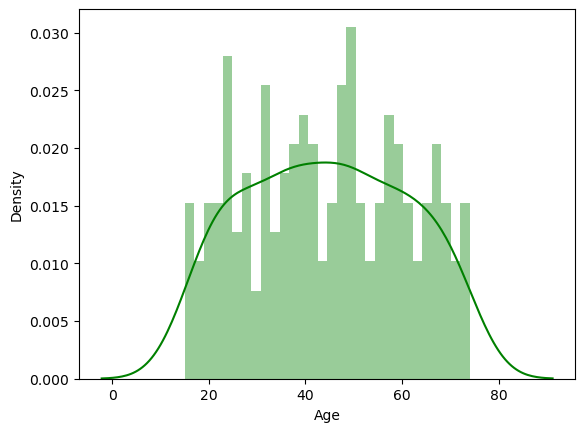

In [109]:
sns.distplot(drugs["Age"],bins=30,color="green")

<AxesSubplot:xlabel='Age'>

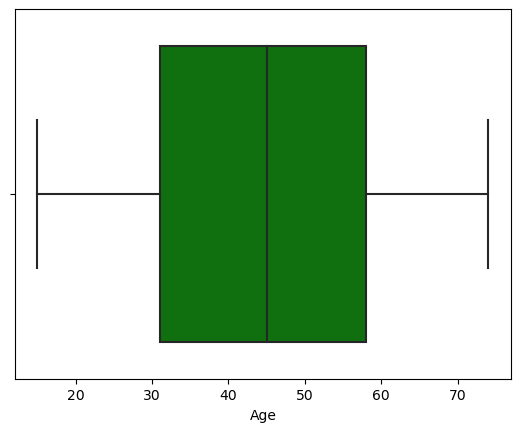

In [110]:
sns.boxplot(drugs["Age"],color="green")

We can see that Age largely follows a normal distribution with a **mean of around 45**. There are also **no outliers** in the Age feature as seen in the boxplot.

**Sex**

<AxesSubplot:ylabel='Sex'>

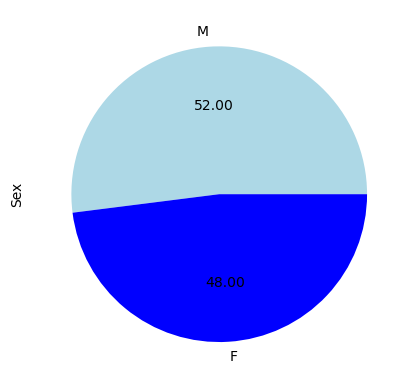

In [111]:
colors = ["lightblue","blue"]
drugs["Sex"].value_counts().plot(kind="pie",autopct="%.2f",colors=colors)

We can see that the genders are largely evenly distributed with **Male** having slightly more than **Female** at 52% to 50% respectively.

**Blood Pressure (BP)**

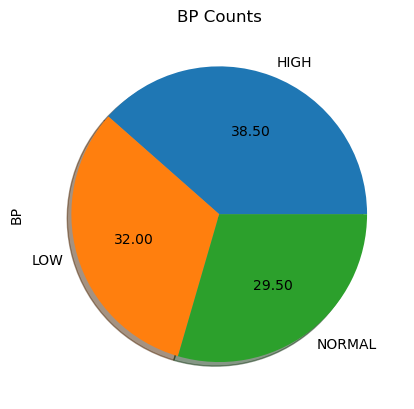

In [112]:
drugs["BP"].value_counts().plot(kind="pie",autopct="%.2f",shadow=True)
plt.title("BP Counts");

Proportion of BP is largely even, with **High BP** having the highest percentage, **Normal BP** has the lowest and **Low BP** being in the middle.

**Cholesterol**

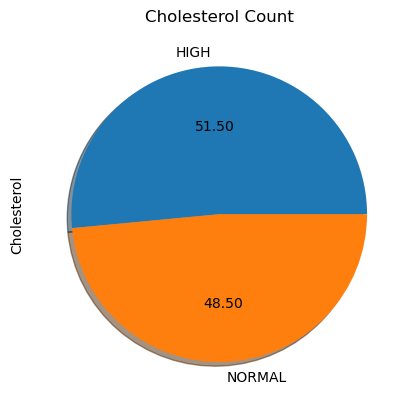

In [113]:
drugs["Cholesterol"].value_counts().plot(kind="pie",autopct="%.2f",shadow=True)
plt.title("Cholesterol Count");

Proportion of Cholesterol in the sample is largely even, with **High Cholesterol** being slightly higher than **Normal Cholesterol**

**Sodium to Potassium (Na_to_K)**

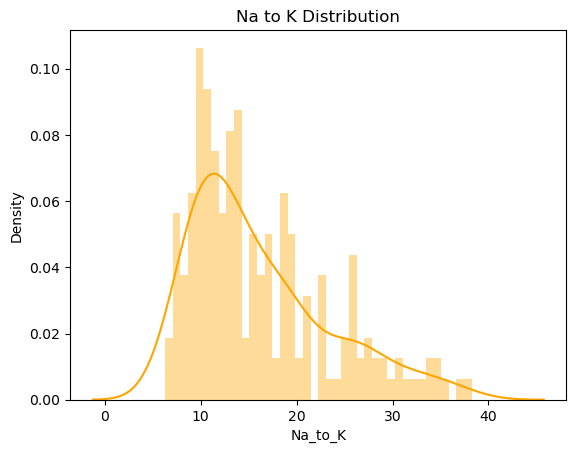

In [114]:
sns.distplot(drugs["Na_to_K"], bins = 40, color ="orange")
plt.title("Na to K Distribution");

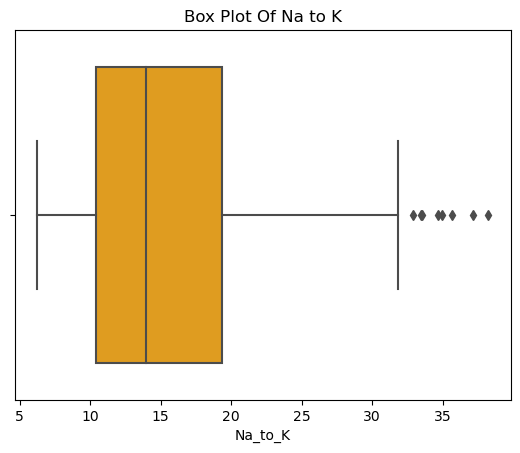

In [115]:
sns.boxplot(drugs["Na_to_K"], color = "orange")
plt.title("Box Plot Of Na to K");

Distribution of Na to K is skewed to the right, mean of Na_to_K is around 14. There are several potential outliers for this feature after the range of around 30.

**Drug**

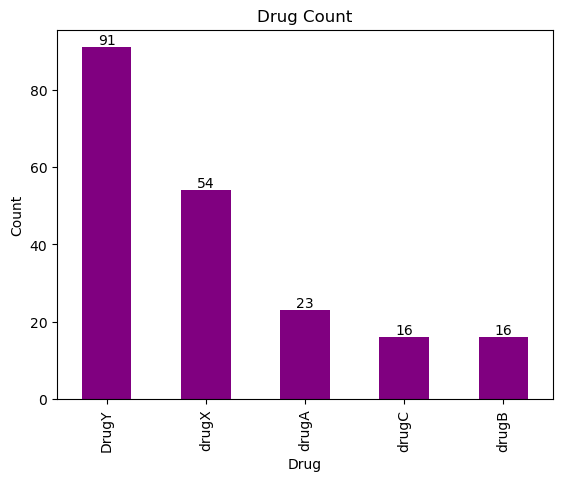

In [116]:
# Create the bar chart
ax = drugs["Drug"].value_counts().plot(kind="bar", color="purple")

plt.title("Drug Count")
plt.ylabel("Count")
plt.xlabel("Drug")

# Add labels on top of each bar
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

plt.show()

Drug Y is the most common, and drugC and drugB is the least common

#### 3.2 Bivariate Analysis

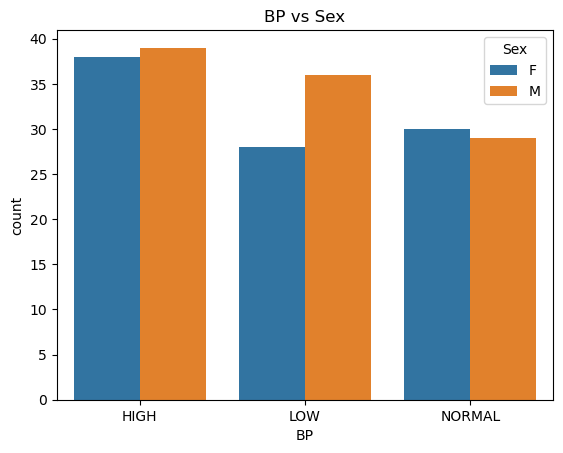

In [117]:
sns.countplot(x="BP",data=drugs,hue="Sex")
plt.title("BP vs Sex");

High BP counts is the highest for both Male and Female. Male has the lowest count of Low BP, while Female has the lowest count of Normal BP.

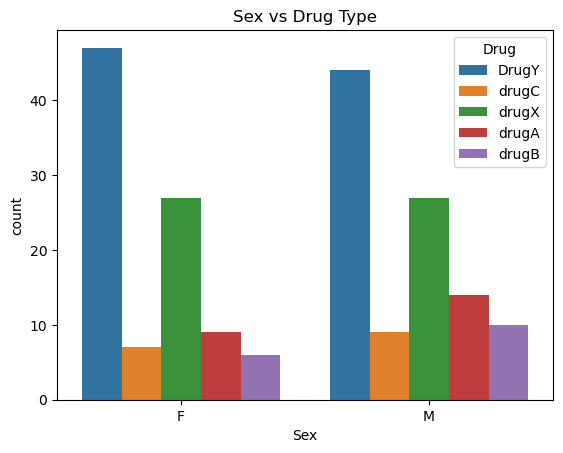

In [118]:
sns.countplot(x="Sex",data=drugs,hue="Drug")
plt.title("Sex vs Drug Type");

The distribution of Drug classifications between Sex is largely even, we can see similar proportions of distribution of each drug type in both Sexes. Males have slightly more usage of Drugs A, C and B, while Females have slightly more usage of Drug Y.

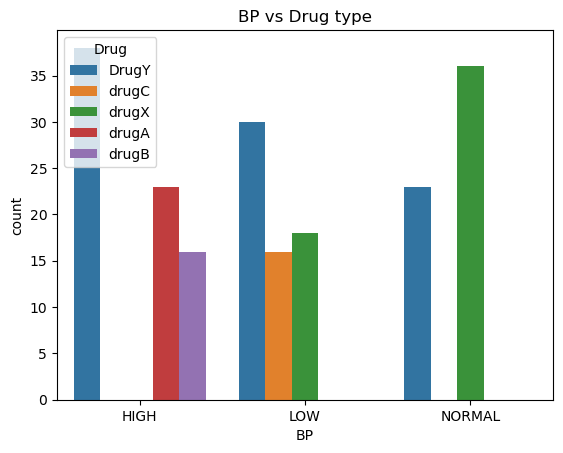

In [119]:
sns.countplot(x="BP",data=drugs,hue="Drug")
plt.title("BP vs Drug type");

Drug Y is used for all types of BP. While Drug X is used for Normal and Low BP. Drug A and B is used only used when BP is High. Drug C is used for Low BP only.

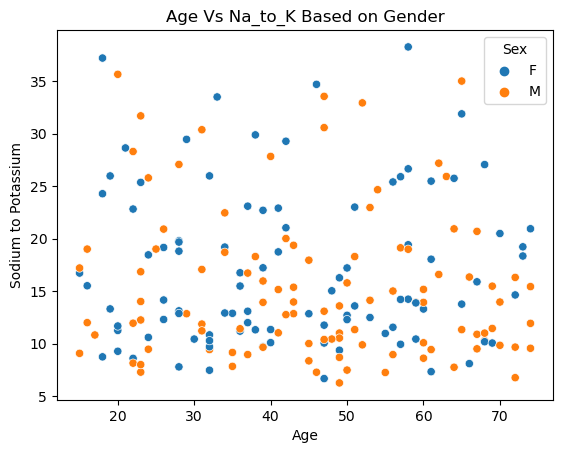

In [120]:
# scatter plot
sns.scatterplot(x="Age",y="Na_to_K",data=drugs,hue="Sex")
plt.title("Age Vs Na_to_K Based on Gender")
plt.xlabel("Age")
plt.ylabel("Sodium to Potassium");

Females are seen to have a slightly lower Na_to_K level compared to Males. Distribution is fairly even through all the ages for both Genders.

### 4. Cleaning Data/ Preparing Data

In [121]:
drugs_2 = drugs #creating a copy of original dataframe

In [122]:
drugs_2[["Sex","BP", "Cholesterol"]] = ord_enc.fit_transform(drugs_2[["Sex","BP", "Cholesterol"]])
drugs_2.head()#transforming category into numerical value

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,DrugY
1,47,1.0,1.0,0.0,13.093,drugC
2,47,1.0,1.0,0.0,10.114,drugC
3,28,0.0,2.0,0.0,7.798,drugX
4,61,0.0,1.0,0.0,18.043,DrugY


In [123]:
drugs_2.corr()

,Age,Sex,BP,Cholesterol,Na_to_K
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000


### 5. Splitting data into training and testing for Modelling

In [124]:
train, test = train_test_split(drugs_2, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(160, 6)
(40, 6)


In [125]:
# Getting input data and targets for building prediction model
X_train = train.drop(['Drug'], axis=1) #5 features are trained and tested against predictor "drug"
y_train = train['Drug']
X_test = test.drop(['Drug'], axis=1)
y_test = test['Drug']

print("X_train shape: ", X_train.shape) 
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
X_train.head()

X_train shape:  (160, 5)
y_train shape:  (160,)
X_test shape:  (40, 5)
y_test shape:  (40,)


,Age,Sex,BP,Cholesterol,Na_to_K
184,18,0.0,0.0,0.0,37.188
48,23,1.0,2.0,0.0,31.686
77,26,0.0,0.0,1.0,19.161
60,38,0.0,1.0,1.0,29.875
88,37,0.0,0.0,1.0,23.091


In [126]:
y_train.head()

184    DrugY
48     DrugY
77     DrugY
60     DrugY
88     DrugY
Name: Drug, dtype: object

### 6. Modelling

#### Logistic Regression

In [127]:
# Training Logistic Regression model
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [128]:
# Doing predictions on train and test set
y_hat_train = LR.predict(X_train)
y_hat_test_LR = LR.predict(X_test)
accuracy_LR = accuracy_score(y_test, y_hat_test_LR)

# Evaluate the performance of your trained model
print("Accuracy score on testing set: ", accuracy_LR)

Accuracy score on testing set:  0.85


#### K Nearest Neighbours

In [129]:
# Create and training a KNN classifier model
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred_KNN = clf.predict(X_test)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print('Testing accuracy when nearest neighbours = 7 is: ', accuracy_KNN)

Testing accuracy when nearest neighbours = 7 is:  0.65


Initial model of K = 7 is not that accurate, so we will use gridsearch method for KNN to get the optimal K value

#### Tuning the Model

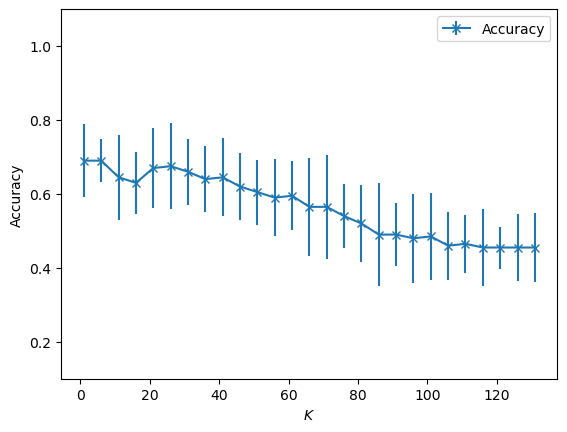

In [130]:
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
drugs.features = drugs.drop(['Drug'], axis=1)
drugs.target = drugs['Drug']
cv_scores = []
cv_scores_std = []
k_range = range(1, 135, 5)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, drugs.features, drugs.target , scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

It can be seen that the accuracy goes down gradually as **K** increases. Accuracy is highest at 1 then drops continuously. It can be noticed that accuracy increases around 20-30 mark before dropping again. Particularly, the performance (measured by the score mean) and its robustness/stableness (measured by the score std) drop substantially around K=60. One possible reason is that when K is bigger than 60, the model suffers from the underfitting issue severely.

In [144]:
from sklearn.model_selection import GridSearchCV
# Define search space for parameters
parameter_grid = {'n_neighbors': range(1, 135)}

# Create the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
# Identify the best parameter(s)
print('Optimal K value: ', clf.best_params_['n_neighbors'])
print('The accuracy: \n', clf.best_score_)

Optimal K value:  1
The accuracy: 
 0.71875


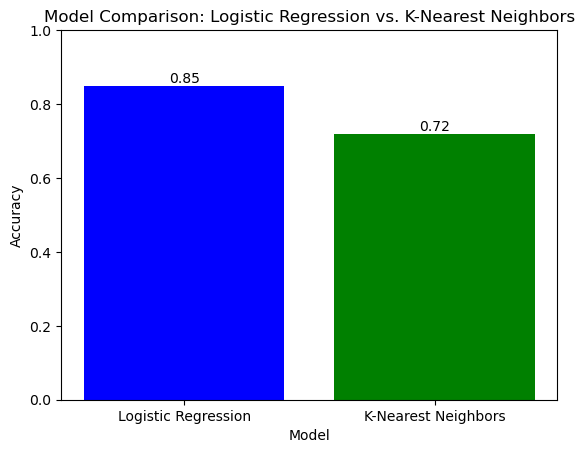

In [141]:
# List of model names and their respective accuracy scores
model_names = ["Logistic Regression", "K-Nearest Neighbors"]
accuracy_scores = [accuracy_LR,clf.best_score_]

# Create a bar graph comparing accuracy with labels on top of each column
plt.bar(model_names, accuracy_scores, color=['blue', 'green'])
plt.title("Model Comparison: Logistic Regression vs. K-Nearest Neighbors")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set the y-axis limits to be between 0 and 1

# Add labels on top of each column
for i in range(len(model_names)):
    plt.text(i, accuracy_scores[i], f"{accuracy_scores[i]:.2f}", ha='center', va='bottom')

plt.show()

### 7. Conclusion

#### Classification Report

In [146]:
# Classification Report for Logistic Regression
classification_report_LR = classification_report(y_test, y_hat_test_LR)
print("LR classification report\n",classification_report_LR)

classification_report_KNN = classification_report(y_test, predictions)
print("KNN classification report\n", classification_report_KNN)

LR classification report
               precision    recall  f1-score   support

       DrugY       0.85      0.79      0.81        14
       drugA       0.80      0.80      0.80         5
       drugB       0.60      0.75      0.67         4
       drugC       1.00      0.50      0.67         2
       drugX       0.94      1.00      0.97        15

    accuracy                           0.85        40
   macro avg       0.84      0.77      0.78        40
weighted avg       0.86      0.85      0.85        40

KNN classification report
               precision    recall  f1-score   support

       DrugY       0.78      1.00      0.88        14
       drugA       0.50      0.20      0.29         5
       drugB       1.00      0.25      0.40         4
       drugC       0.14      0.50      0.22         2
       drugX       0.67      0.53      0.59        15

    accuracy                           0.62        40
   macro avg       0.62      0.50      0.48        40
weighted avg       0.69 

#### Comparison

The Logistic Regression model generally outperforms the KNN model in terms of overall accuracy and F1-scores. It provides more balanced results across the classes.
The KNN model has some classes with high recall but low precision, while the LR model tends to have more balanced precision and recall.
The KNN model may need further tuning to improve its performance, particularly in terms of precision and F1-scores.
The choice between these models depends on the specific goals and trade-offs in your classification task. If high precision is crucial, LR may be a better choice, while if capturing as many true positives as possible is more important, KNN may be a better alternative.